In [77]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#这次是预测概率，当然，测试结果没啥用，基本上测不准，因为光靠这几个价格怎么可能推测出每天的涨停。
#所以这里只是展示一个例子而已。

data = pd.read_csv("./601398_1d.csv")
data

,Unnamed: 0,open,high,low,close,volume,money
0,2014-05-05,2.41,2.41,2.38,2.41,60777805.0,1.455491e+08
1,2014-05-06,2.41,2.41,2.38,2.39,69752898.0,1.674040e+08
2,2014-05-07,2.39,2.41,2.39,2.41,45107929.0,1.082613e+08
3,2014-05-08,2.39,2.43,2.39,2.41,58655820.0,1.416913e+08
4,2014-05-09,2.42,2.44,2.41,2.43,64827377.0,1.574709e+08
...,...,...,...,...,...,...,...
1598,2020-11-20,5.05,5.06,5.01,5.03,126572054.0,6.366256e+08
1599,2020-11-23,5.01,5.08,5.01,5.07,282580046.0,1.428218e+09
1600,2020-11-24,5.07,5.09,5.05,5.05,189318043.0,9.598792e+08
1601,2020-11-25,5.08,5.11,5.04,5.04,200292965.0,1.017148e+09


In [84]:
data["IsUp"]= (data["close"]-data["open"])

data

,Unnamed: 0,open,high,low,close,volume,money,IsUp
0,2014-05-05,2.41,2.41,2.38,2.41,60777805.0,1.455491e+08,0.00
1,2014-05-06,2.41,2.41,2.38,2.39,69752898.0,1.674040e+08,-0.02
2,2014-05-07,2.39,2.41,2.39,2.41,45107929.0,1.082613e+08,0.02
3,2014-05-08,2.39,2.43,2.39,2.41,58655820.0,1.416913e+08,0.02
4,2014-05-09,2.42,2.44,2.41,2.43,64827377.0,1.574709e+08,0.01
...,...,...,...,...,...,...,...,...
1598,2020-11-20,5.05,5.06,5.01,5.03,126572054.0,6.366256e+08,-0.02
1599,2020-11-23,5.01,5.08,5.01,5.07,282580046.0,1.428218e+09,0.06
1600,2020-11-24,5.07,5.09,5.05,5.05,189318043.0,9.598792e+08,-0.02
1601,2020-11-25,5.08,5.11,5.04,5.04,200292965.0,1.017148e+09,-0.04


In [98]:

data.loc[data.IsUp>0,'IsUp'] = 1
data.loc[data.IsUp<=0,'IsUp'] = 0


data['IsUp'] = data['IsUp'].astype(int)
data


,Unnamed: 0,open,high,low,close,volume,money,IsUp
0,2014-05-05,2.41,2.41,2.38,2.41,60777805.0,1.455491e+08,0
1,2014-05-06,2.41,2.41,2.38,2.39,69752898.0,1.674040e+08,0
2,2014-05-07,2.39,2.41,2.39,2.41,45107929.0,1.082613e+08,1
3,2014-05-08,2.39,2.43,2.39,2.41,58655820.0,1.416913e+08,1
4,2014-05-09,2.42,2.44,2.41,2.43,64827377.0,1.574709e+08,1
...,...,...,...,...,...,...,...,...
1598,2020-11-20,5.05,5.06,5.01,5.03,126572054.0,6.366256e+08,0
1599,2020-11-23,5.01,5.08,5.01,5.07,282580046.0,1.428218e+09,1
1600,2020-11-24,5.07,5.09,5.05,5.05,189318043.0,9.598792e+08,0
1601,2020-11-25,5.08,5.11,5.04,5.04,200292965.0,1.017148e+09,0


In [99]:
data.iloc[:,-1].value_counts()
x = data.iloc[:,1:-4]
y = data.iloc[:,-1]

In [104]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, input_shape=(3,), activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
#最后输出一个概率值
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [92]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [107]:
history = model.fit(x,y,epochs=100)

Epoch 1/100
51/51 [==============================] - 0s 1ms/step - loss: 0.6868 - acc: 0.5465
Epoch 2/100
51/51 [==============================] - 0s 1ms/step - loss: 0.6863 - acc: 0.5908
Epoch 3/100
51/51 [==============================] - 0s 1ms/step - loss: 0.6878 - acc: 0.5371
Epoch 4/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6877 - acc: 0.5346
Epoch 5/100
51/51 [==============================] - 0s 1ms/step - loss: 0.6866 - acc: 0.5483
Epoch 6/100
51/51 [==============================] - 0s 1ms/step - loss: 0.6869 - acc: 0.5664
Epoch 7/100
51/51 [==============================] - 0s 1ms/step - loss: 0.6863 - acc: 0.5508
Epoch 8/100
51/51 [==============================] - 0s 1ms/step - loss: 0.6866 - acc: 0.5639
Epoch 9/100
51/51 [==============================] - 0s 1ms/step - loss: 0.6878 - acc: 0.5315
Epoch 10/100
51/51 [==============================] - 0s 1ms/step - loss: 0.6867 - acc: 0.5571
Epoch 11/100
51/51 [==============================] - 0s 1m

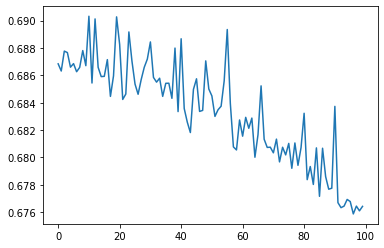

In [108]:
history.history.keys()

plt.plot(history.epoch,history.history.get('loss'))

In [109]:
test_x = x.iloc[:10,:]
test_y = y.iloc[:10]
data.iloc[0:10,:]

,Unnamed: 0,open,high,low,close,volume,money,IsUp
0,2014-05-05,2.41,2.41,2.38,2.41,60777805.0,145549104.0,0
1,2014-05-06,2.41,2.41,2.38,2.39,69752898.0,167403952.0,0
2,2014-05-07,2.39,2.41,2.39,2.41,45107929.0,108261312.0,1
3,2014-05-08,2.39,2.43,2.39,2.41,58655820.0,141691312.0,1
4,2014-05-09,2.42,2.44,2.41,2.43,64827377.0,157470928.0,1
5,2014-05-12,2.43,2.46,2.42,2.45,97794329.0,239121072.0,1
6,2014-05-13,2.45,2.45,2.43,2.43,54881039.0,133725792.0,0
7,2014-05-14,2.43,2.45,2.42,2.43,53518516.0,130153184.0,0
8,2014-05-15,2.43,2.45,2.42,2.44,51895679.0,126447488.0,1
9,2014-05-16,2.44,2.45,2.43,2.45,54715255.0,133887120.0,1


In [110]:
model.predict(test_x)

array([[0.46407115],
       [0.46407115],
       [0.4683898 ],
       [0.47919962],
       [0.47023183],
       [0.47549987],
       [0.4612833 ],
       [0.47009596],
       [0.47009596],
       [0.46456337]], dtype=float32)

In [111]:
test_y

0    0
1    0
2    1
3    1
4    1
5    1
6    0
7    0
8    1
9    1
Name: IsUp, dtype: int32